# Indicators of I-94 Traffic Dataset.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

The **data dictionary** is given as follows:
 - **holiday**: Categorical US National holidays plus regional holiday, Minnesota State Fair
 - **temp**: Numeric Average temp in kelvin
 - **rain_1h**: Numeric Amount in mm of rain that occurred in the hour
 - **snow_1h**: Numeric Amount in mm of snow that occurred in the hour
 - **clouds_all**: Numeric Percentage of cloud cover
 - **weather_main**: Categorical Short textual description of the current weather
 - **weather_descriptio**:n Categorical Longer textual description of the current weather
 - **date_time**: DateTime Hour of the data collected in local CST time
 - **traffic_volume**: Numeric Hourly I-94 ATR 301 reported westbound traffic volume




In [1]:
#importing all the essential libraries.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
#reading our file into the dataframe
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
#looking at the descriptive measures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are no missing values in our data and only the **date_time** column is of the wrong datatype.
Let us do some data cleaning.

## Data Cleaning

### 1) Changing the data type of date_time column.

In [4]:
data["date_time"]=pd.to_datetime(data["date_time"])
data["date_time"].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

### 2) Looking for duplicate entries.

In [5]:
df = pd.DataFrame()
count=data["date_time"].value_counts().reset_index()
for dt in count.loc[count["date_time"]>1,"index"]:
    df=df.append(data[data["date_time"]==dt])
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
5249,None,274.79,0.0,0.0,90,Mist,mist,2013-04-18 22:00:00,1532
5250,None,274.79,0.0,0.0,90,Drizzle,light intensity drizzle,2013-04-18 22:00:00,1532
5251,None,274.79,0.0,0.0,90,Rain,light rain,2013-04-18 22:00:00,1532
5252,None,274.79,0.0,0.0,90,Rain,moderate rain,2013-04-18 22:00:00,1532
5253,None,274.79,0.0,0.0,90,Snow,heavy snow,2013-04-18 22:00:00,1532


It is not possible to record different indicators of the traffic of the same place and the same time, multiple times.
These seem to be duplicate records. The records have different weather at the same time which does not seem right.
Therefore, we will remove duplicates and keep the first row.

In [6]:
#by default first row is kept
data.drop_duplicates(subset=["date_time"],inplace=True)
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### 3) Outlier Detection.

Now we look for the values that like to break all the rules, popularly called **outliers**.
We start with **temp** column

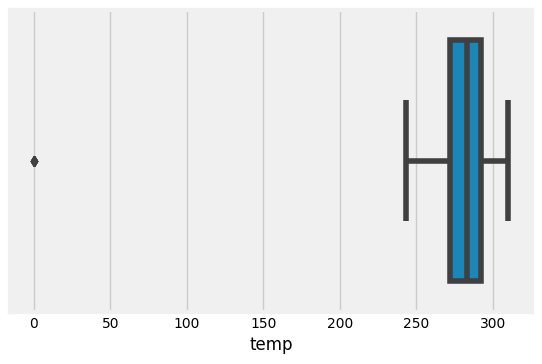

In [7]:
%matplotlib inline
sns.boxplot(x="temp",data=data)
plt.show()

Most observations for the temp column are 200 and above. There is an outlier in temperature column where temp=0.

In [8]:
data["temp"].value_counts().sort_index().head(1)

0.0    10
Name: temp, dtype: int64

10 data points correspond to temp=0

In [9]:
per_temp_0=((data[data["temp"]==0].shape[0])*100)/data.shape[0]
per_temp_0

0.024645717806531114

The percentage of outliers in temp column is 0.02% of the whole data, so these observations can be removed.

In [10]:
#removal of temp outliers
data=data[data["temp"]>0]

Now let us observe **rain_1h** column.

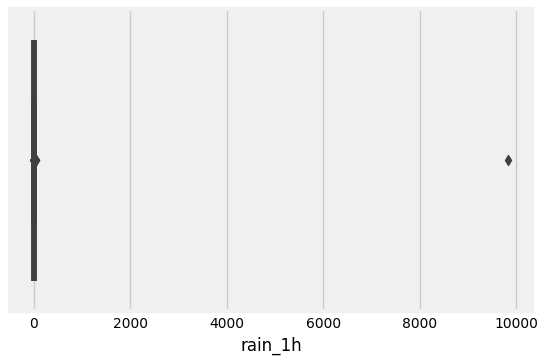

In [11]:
sns.boxplot(x="rain_1h",data=data)
plt.show()

In [12]:
data["rain_1h"].value_counts().sort_index(ascending=False).head()

9831.30    1
55.63      1
44.45      1
31.75      1
28.70      1
Name: rain_1h, dtype: int64

The highest rainfall per hour in mm is recorded to be 9831 which seems impossible. If this observation is kept in our analysis, it will result in skewness. 
We will remove this as well and not consider other outliers (shown in the boxplot) for removal.

In [13]:
data=data[data["rain_1h"]!=9831.30]

Let us check for outliers in **snow_!h** column.

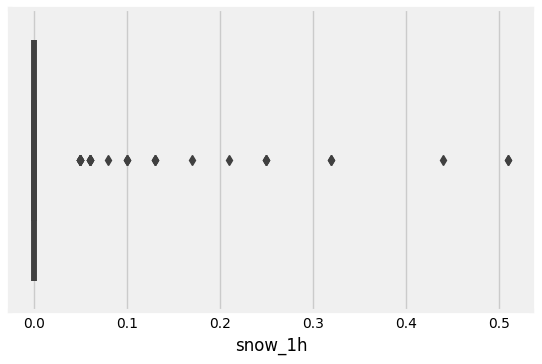

In [14]:
sns.boxplot(x="snow_1h",data=data)
plt.show()

According to our boxplot, the observations greater than 0.0 are outliers. Let us observe the percentage of these "outliers".

In [15]:
per_snow_0=((data[data["snow_1h"]>0].shape[0])*100)/data.shape[0]
per_snow_0

0.07642244354600138

As the percentage of these outliers is quite low, we will remove these too.

In [16]:
data=data[data["snow_1h"]==0]

Let us proceed to check other columns quickly.

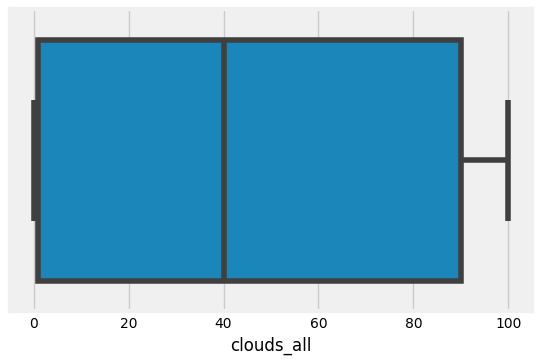

In [17]:
sns.boxplot(x="clouds_all",data=data)
plt.show()

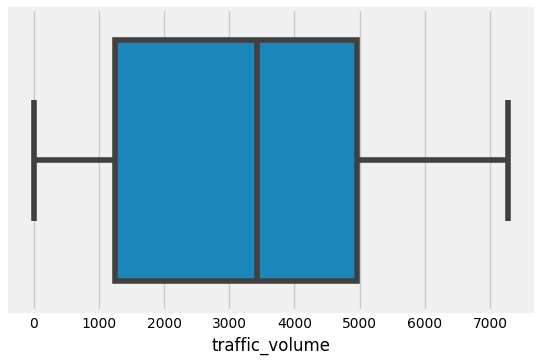

In [18]:
sns.boxplot(x="traffic_volume",data=data)
plt.show()

No outliers observed in the **clouds_all and traffic_volume** columns.

### 4) Adding date time columns in the data.

In [19]:
import datetime as dt
data["date"]=data["date_time"].dt.date
data["hour"]=data["date_time"].dt.time
data["month"]=data["date_time"].dt.month
data["year"]=data["date_time"].dt.year
data["weekday"]=data["date_time"].dt.day_name()
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,hour,month,year,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00,10,2012,Tuesday
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00,10,2012,Tuesday
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00,10,2012,Tuesday
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00,10,2012,Tuesday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00,10,2012,Tuesday


## Analysis

### Date-Time Factors

Let us see how for each year, traffic varies every month.

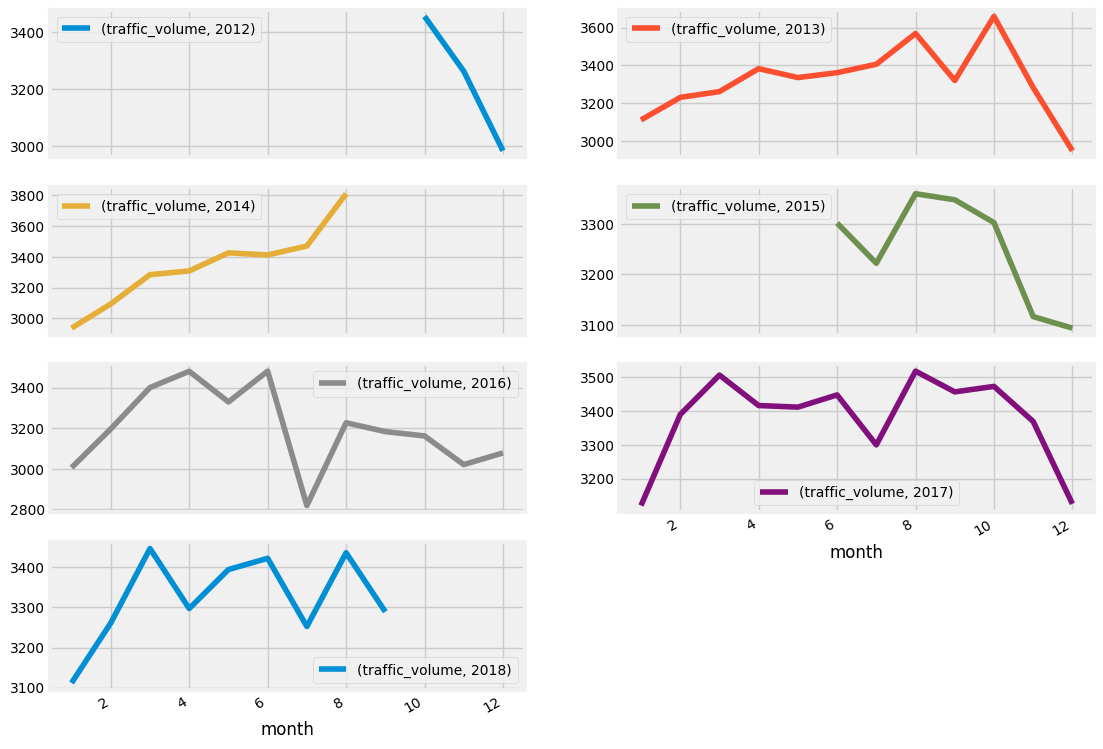

In [20]:
a=data.groupby(["year","month"])["traffic_volume"].mean().reset_index()
a.set_index(["year","month"],inplace=True)
a.unstack(level=0).plot(figsize=(12,10),subplots=True,layout=(4,2),legend=True)
plt.show()

Here the plots are made for different years and in each year, there are some common trends that one can observe.
1. In years 2015 onwards, there is always a drop in July-August.
2. During months November-February steep decline in traffic is observed. This happens maybe due to cold weather.
3. July months sees a sudden decline in most years.
4. In year 2016, we see the lowest traffic of all years, in July. This was due to protests against the police shooting of Philando Castile, which led to shutdown of the freeway.
5. Higher average traffic is observed for August, which usually has warm weather.

Let us breakdown our data in days of the week and see which days usually have the higher average traffic.

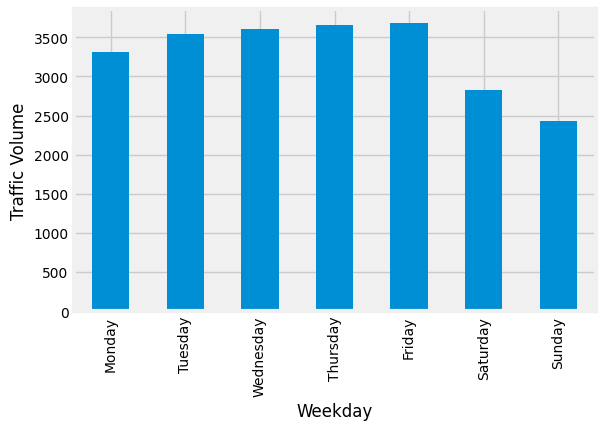

In [21]:
day_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data.groupby("weekday")["traffic_volume"].mean().loc[day_order].plot.bar()
plt.ylabel("Traffic Volume")
plt.xlabel("Weekday")
plt.show()

As expected, higher traffic is observed on weekdays than weekends.

Let us now group this data into **Business days** and **Weekdays**. We will see how traffic varies in these two types of days, for **every hour of the day**.

In [22]:
data["day_type"]=np.where((data["weekday"]=="Sunday")|(data["weekday"]=="Saturday"),"Weekend","Business Day")

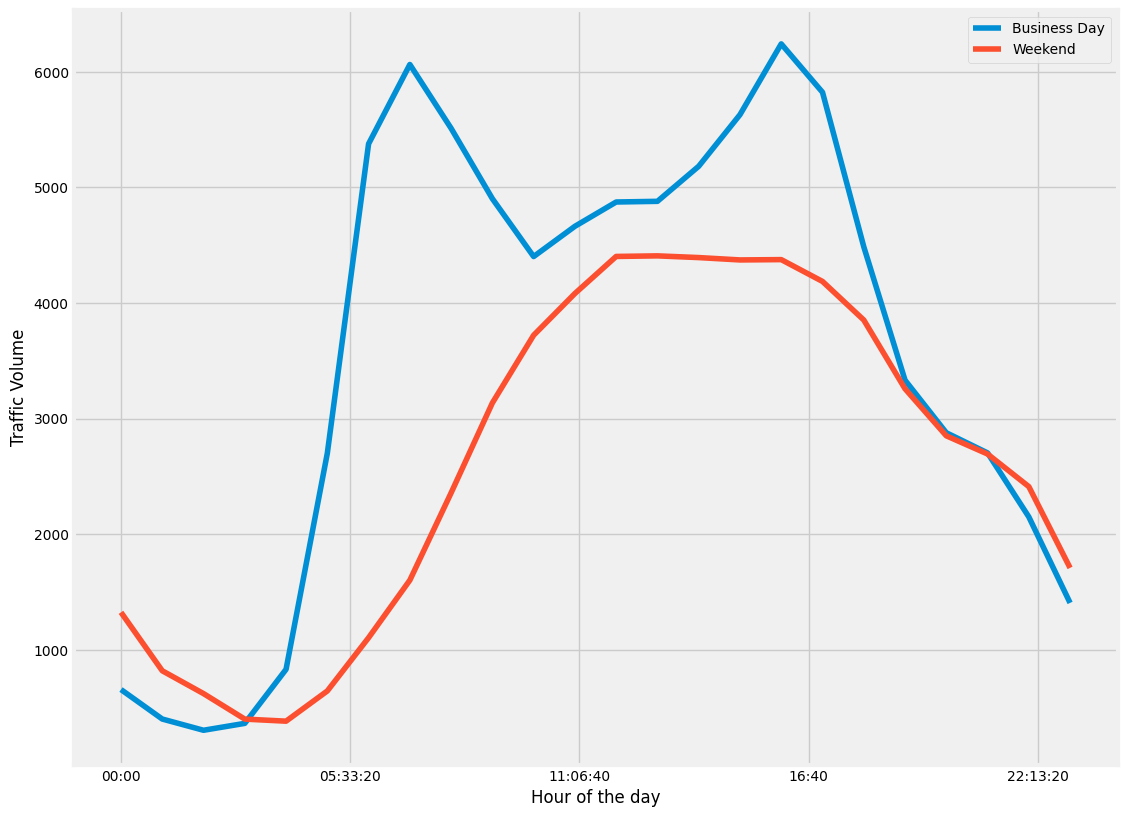

In [23]:
a=data.groupby(["day_type","hour"])["traffic_volume"].mean().reset_index()
a.set_index(["day_type","hour"],inplace=True)                     
a.unstack(level=0).plot(figsize=(12,10))
plt.legend(["Business Day","Weekend"],loc="best")
plt.ylabel("Traffic Volume")
plt.xlabel("Hour of the day")
plt.show()

As already observed in the previous bar plot, the traffic on weekends is lower than that on weekdays, for most hours of a day. However, it is interesting to note that during 8.00 p.m.-4.00 a.m. , traffic is lighter on weekdays than weekends. Maybe, because most people are catching some sleep during nighttime.

Now let's check if public holidays affect traffic.

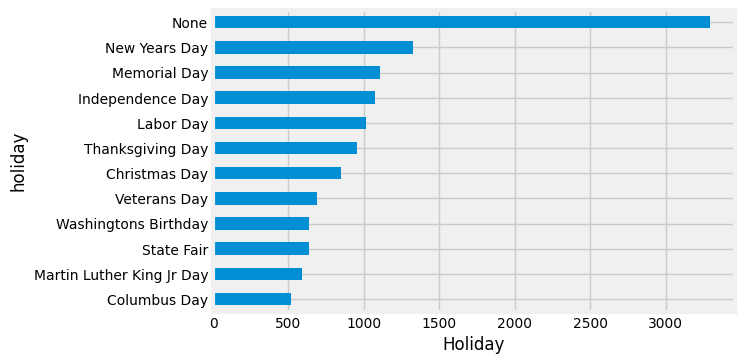

In [24]:
data.groupby("holiday")["traffic_volume"].mean().sort_values().plot.barh()
plt.xlabel("Traffic Volume")
plt.xlabel("Holiday")
plt.show()

This was also one of our apriori expectations. On public holidays, the volume of traffic is much lower than that on the other days.

Let us now see whether **weather** has any significant effect on traffic.

### Weather Factors

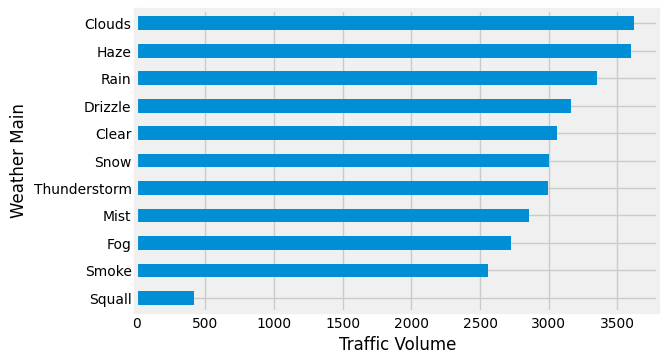

In [25]:
data.groupby("weather_main")["traffic_volume"].mean().sort_values().plot.barh()
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Main")
plt.show()

Overall, it is interesting to see here some weather patterns exhibit higher traffic than **clear** weather.
Fog, squall and smoke result in lower traffic as expected.

Now we will look at a more descriptive column, **weather description**.

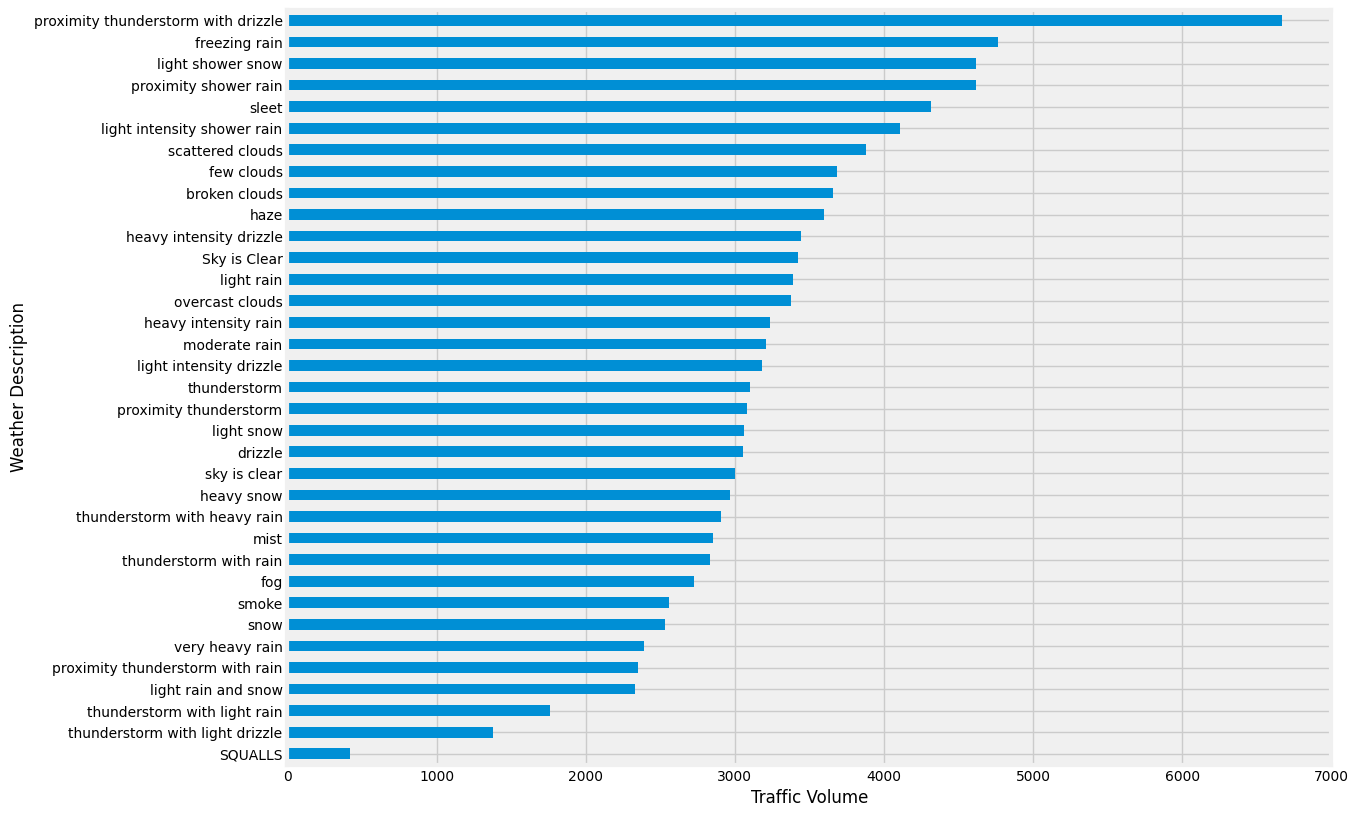

In [26]:
plt.figure(figsize=(12,10))
data.groupby("weather_description")["traffic_volume"].mean().sort_values().plot.barh()
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")
plt.show()

**Squalls,Proximity thunderstorm with drizzle and light rain and snow** are linked to lowest average traffic on I94.
Now let us see if there is any link between temperature and traffic volume.

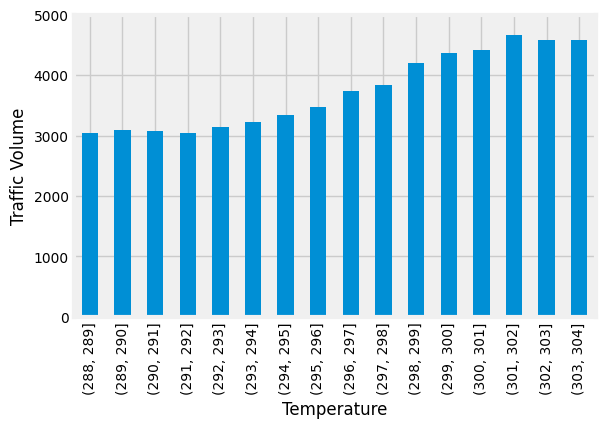

In [27]:
data.groupby(pd.cut(data["temp"],range(288,305)))["traffic_volume"].mean().plot.bar()
plt.ylim(0,5000)
plt.ylabel("Traffic Volume")
plt.xlabel("Temperature")
plt.show()
plt.show()

**Warmer weather** is linked to higher traffic.

## Conclusions.

1. In years 2015 onwards, there is always a drop in July-August.
2. During cold months November-February steep decline in traffic is observed.
3. July months sees a sudden decline in most years.
4. In year 2016, we see the lowest traffic of all years, in July. This was due to protests against the police shooting of Philando Castile, which led to shutdown of the freeway.
5. Higher average traffic is observed for August, which usually has warm weather.
6. The traffic on weekends is lower than that on weekdays, for most hours of a day, but during nighttime, traffic is lighter on weekdays than weekends. The peaks of traffic are observed at 7.00 am and 4.00 p.m. on weekdays and around 12.00 p.m. on weekends.
7. On public holidays, the volume of traffic is much lower than that on the other days.
8. some weather patterns exhibit higher traffic than **clear** weather.
Fog, squall and smoke are linked with lower traffic as expected.
9. Squalls,Proximity thunderstorm with drizzle and light rain and snow are linked to lowest average traffic on I94.
10. Warmer weather is linked to higher traffic.